In [1]:
%pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 660.6 kB/s eta 0:04:52
   ---------------------------------------- 0.9/192.3 MB 11.2 MB/s eta 0:00:18
    --------------------------------------- 2.5/192.3 MB 20.2 MB/s eta 0:00:10
    --------------------------------------- 4.0/192.3 MB 23.0 MB/s eta 0:00:09
   - -------------------------------------- 5.3/192.3 MB 24.1 MB/s eta 0:00:08
   - -------------------------------------- 6.6/192.3 MB 24.8 MB/s eta 0:00:08
   - -------------------------------------- 8.0/192.3 MB 25.6 MB/s eta 0:00:08
   - -------------------------------------- 9.2/192.3 MB 25.5 MB/s eta 0:00:08
   -- ------------------------------------- 10.2/192.3 MB 25.2 MB/s eta 0:00:08
   -- ------

에폭 [100/1000], 손실: 1.1325
에폭 [200/1000], 손실: 1.0919
에폭 [300/1000], 손실: 1.0768
에폭 [400/1000], 손실: 1.0713
에폭 [500/1000], 손실: 1.0692
에폭 [600/1000], 손실: 1.0685
에폭 [700/1000], 손실: 1.0682
에폭 [800/1000], 손실: 1.0681
에폭 [900/1000], 손실: 1.0680
에폭 [1000/1000], 손실: 1.0680


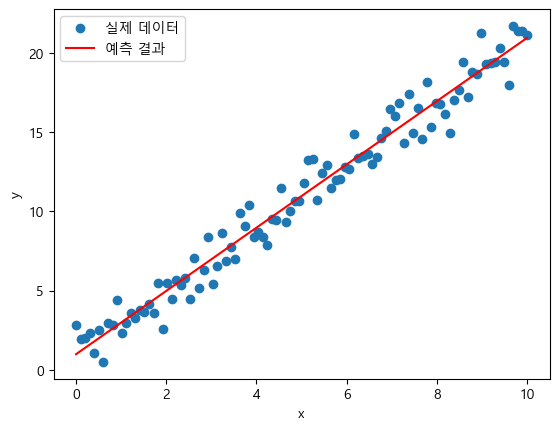

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

# 학습 데이터 생성
x = torch.linspace(0, 10, 100).unsqueeze(1)  # 입력 데이터
y = 2*x + 1 + torch.randn(100, 1)  # 정답 레이블 (기울기: 2, 절편: 1)

# 모델 정의
model = nn.Linear(1, 1)  # 선형 모델 (입력 차원: 1, 출력 차원: 1)

# 손실 함수 정의
criterion = nn.MSELoss()

# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 학습
num_epochs = 1000  # 에폭 수

for epoch in range(num_epochs):
    # Forward 계산
    outputs = model(x)
    
    # 손실 계산
    loss = criterion(outputs, y)
    
    # Backward 계산 및 경사 하강
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 로그 출력
    if (epoch+1) % 100 == 0:
        print(f'에폭 [{epoch+1}/{num_epochs}], 손실: {loss.item():.4f}')

# 학습된 모델의 예측 결과 확인
predicted = model(x)

# 그래프 그리기
plt.scatter(x, y, label='실제 데이터')
plt.plot(x, predicted.detach().numpy(), color='red', label='예측 결과')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

가중치(w): -0.2611, 편향(b): 0.2676
에폭 [100/1000], 손실: 1.0055, 가중치(w): 2.0388, 편향(b): 0.7508
에폭 [200/1000], 손실: 0.9985, 가중치(w): 2.0265, 편향(b): 0.8324
에폭 [300/1000], 손실: 0.9959, 가중치(w): 2.0191, 편향(b): 0.8821
에폭 [400/1000], 손실: 0.9949, 가중치(w): 2.0145, 편향(b): 0.9123
에폭 [500/1000], 손실: 0.9946, 가중치(w): 2.0118, 편향(b): 0.9306
에폭 [600/1000], 손실: 0.9944, 가중치(w): 2.0101, 편향(b): 0.9418
에폭 [700/1000], 손실: 0.9944, 가중치(w): 2.0091, 편향(b): 0.9486
에폭 [800/1000], 손실: 0.9944, 가중치(w): 2.0085, 편향(b): 0.9527
에폭 [900/1000], 손실: 0.9944, 가중치(w): 2.0081, 편향(b): 0.9552
에폭 [1000/1000], 손실: 0.9944, 가중치(w): 2.0078, 편향(b): 0.9567
최적화된 가중치(w): 2.0078, 최적화된 편향(b): 0.9567


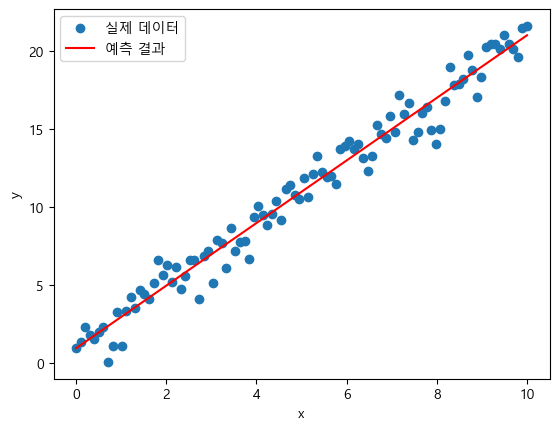

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 학습 데이터 생성
x = torch.linspace(0, 10, 100).unsqueeze(1)  # 입력 데이터
y = 2*x + 1 + torch.randn(100, 1)  # 정답 레이블 (기울기: 2, 절편: 1)

# 모델 정의
model = nn.Linear(1, 1)  # 선형 모델 (입력 차원: 1, 출력 차원: 1)

# 손실 함수 정의
criterion = nn.MSELoss()

# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 학습
num_epochs = 1000  # 에폭 수

w = model.weight.item()
b = model.bias.item()
print(f'가중치(w): {w:.4f}, 편향(b): {b:.4f}')

for epoch in range(num_epochs):
    # Forward 계산
    outputs = model(x)
    
    # 손실 계산
    loss = criterion(outputs, y)
    
    # Backward 계산 및 경사 하강
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 중간 결과 출력
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f'에폭 [{epoch+1}/{num_epochs}], 손실: {loss.item():.4f}, 가중치(w): {w:.4f}, 편향(b): {b:.4f}')

# 최적화된 가중치(w)와 편향(b) 확인
w_opt = model.weight.item()
b_opt = model.bias.item()
print(f'최적화된 가중치(w): {w_opt:.4f}, 최적화된 편향(b): {b_opt:.4f}')

# 학습된 모델의 예측 결과 확인
predicted = model(x)

# 그래프 그리기
plt.scatter(x, y, label='실제 데이터')
plt.plot(x, predicted.detach().numpy(), color='red', label='예측 결과')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()